In [241]:
# Importing Necessary Libraries
import matplotlib.pyplot as plt
import math
import copy
from scipy.fft import fft
import numpy as np

In [264]:

class MUs:
    def __init__(self, start, end, end_signal, peak_value, peak_index, duration, corresponding_template, values):
        self.start = start
        self.end = end
        self.end_signal = end_signal
        self.peak_value = peak_value
        self.peak_index = peak_index
        self.duration = duration
        self.corresponding_template = corresponding_template
        self.values = values


def plot_signal(signal, start, end, name):
    plt.plot(signal[start: end])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Signal Graph')
    plt.savefig(name, dpi=300, bbox_inches='tight')
    plt.show()
    return plt

def show_MUAP_values(muap, name):
    print("MUAP Values:")
    print(f"Start: {muap.start}")
    print(f"End: {muap.end}")
    print(f"End Signal: {muap.end_signal}")
    print(f"Peak Value: {muap.peak_value}")
    print(f"Peak Index: {muap.peak_index}")
    print(f"Duration: {muap.duration}")
    #print(f"Template: {muap.corresponding_template}")
    plot_signal(muap.values, 0, 20, name)

In [243]:
def read_signal(signal_file_name):
    # Read data from Data.txt
    with open(signal_file_name, 'r') as file:
        data = file.read().splitlines()

    # Convert data to signal representation
    signal = [float(value) for value in data]

    plot_signal(signal, 30000, 35000, "signal.png")
    return signal

In [244]:
 def rectify_signal(signal):
    # Recitifying
    rect_signal = [float(0) for value in range(len(signal))]
    for i in range(len(signal)):
        rect_signal[i] = abs(signal[i])

    # plot_signal(signal, 30000, 35000, "rect.png")
    plot_signal(rect_signal, 30000, 35000, "rect.png")
    return rect_signal

In [245]:
 def Moving_average_signal(rect_signal):
    window_size = 20
    filt_signal = []

    for i in range(len(rect_signal)):
        if i < window_size:
            # For the first few elements, where the window is not fully formed yet
            avg = sum(rect_signal[0:i+1]) / (i + 1)
        else:
            # For the rest of the elements, where the window is fully formed
            avg = sum(rect_signal[i-window_size+1:i+1]) / window_size

        filt_signal.append(avg)

    plot_signal(filt_signal, 30000, 35000, "filtered.png")
    return filt_signal

In [258]:
# Step 1
# returns an object of the found MUAP with all the given
def step_one(filt_signal, start, T):
    threshold = Threshold  # Assuming Threshold is a predefined variable

    # Check if at least 20 consecutive samples starting from the start point are all greater than the threshold
    for i in range(start, start + T):
        if filt_signal[i] <= threshold:
            return i  # Return the value of the last sample that is less than the threshold

    # If all 20 consecutive samples are greater than the threshold, continue sampling until a value less than the threshold is found
    end = start + T
    while end < len(filt_signal) and filt_signal[end] > threshold:
        end += 1

    # Create an instance of the MUs class
    peak_value = max(signal[start:end+1])
    peak_index = signal.index(peak_value)
    duration = T + 1
    start = peak_index- 10
    end_signal = max(end,peak_index + 10)
    end = peak_index+ 10
    corresponding_template = 0
    # for i in range(21):
    values = signal[start:end+1]
    muap = MUs(start, end, end_signal, peak_value, peak_index, duration, corresponding_template, values)

    return muap


In [247]:
def compute_difference(muap, template):
    # Compute the difference between the corresponding values of the MUAP and template
    difference = 0
    for i in range(min(T, len(muap.values), len(template.values))): ##########
        difference += math.pow((muap.values[i] - template.values[i]), 2)
    return difference

In [270]:
# Step 2
def step_two(muap_list):
    templates = []
    for muap in muap_list:
        new_template = True
        if len(templates) == 0:
            template = copy.deepcopy(muap)
            templates.append(template)
            muap.corresponding_template = len(templates)
            new_template = False
        else:
            min_difference = float('inf')  # Initialize with a large value
            matching_template = None
            for template in templates:
                difference = compute_difference(template, muap)
                if difference < DiffTh and difference < min_difference:
                    min_difference = difference
                    matching_template = template

            if matching_template is not None:
                new_template = False
                matching_index = templates.index(matching_template)
                muap.corresponding_template = matching_index + 1
                for i in range(len(matching_template.values)):
                    templates[matching_index].values[i] = (templates[matching_index].values[i] + muap.values[i]) / 2

        if new_template:
            template = copy.deepcopy(muap)
            templates.append(template)
            muap.corresponding_template = len(templates)

    #Remove the duplicate templates and keep only the three templates you want
    templates_to_delete = []
    for i in range(len(templates)):
        if i not in [0, 1, 2]:  # Keep the first, third, and sixth templates, delete the rest
            templates_to_delete.append(i)

    for index in sorted(templates_to_delete, reverse=True):
        #print(index)
        if index < len(templates):
            del templates[index]



    for muap in muap_list:
#         if muap.corresponding_template == 4 or muap.corresponding_template == 6 or muap.corresponding_template == 9:
        if muap.corresponding_template in [4,6,9]:
            muap.corresponding_template = 2
        if muap.corresponding_template == 5 or muap.corresponding_template == 7 or muap.corresponding_template == 8:
            muap.corresponding_template = 3
    return templates


In [249]:
# Signal Test Loop (Main)
def final_plot_signal(signal, start, end, name, star_1_positions, star_2_positions, star_3_positions):
    plt.plot(signal)

    #plt.axis('equal')  # Ensure a 1:1 aspect ratio

    for x_pos in star_1_positions:
        y_pos = 830
        plt.annotate('*', xy=(x_pos, y_pos), xytext=None, textcoords='data',
                    ha='center', fontsize=12, color='red')

    for idx, x_pos in enumerate(star_2_positions):
        y_pos = 830
        text = f'* ({idx+1})'
        plt.annotate('*', xy=(x_pos, y_pos), xytext=None, textcoords='data',
                    ha='center', fontsize=12, color='blue')

    for x_pos in star_3_positions:
        y_pos = 830
        plt.annotate('*', xy=(x_pos, y_pos), xytext=None, textcoords='data',
                    ha='center', fontsize=12, color='green')

    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Signal Graph')
    plt.xlim(start, end)
    plt.savefig(name, dpi=300, bbox_inches='tight')
    plt.show()
    return plt


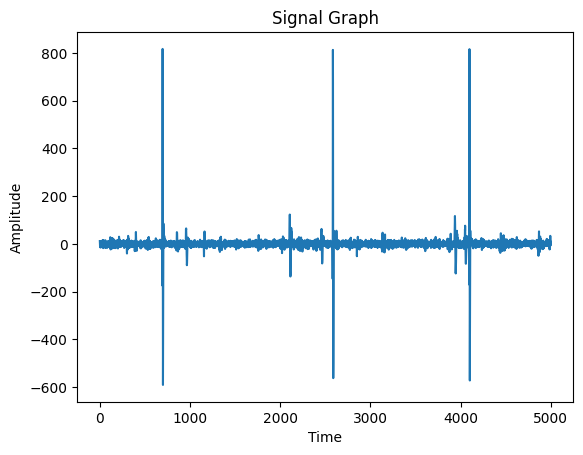

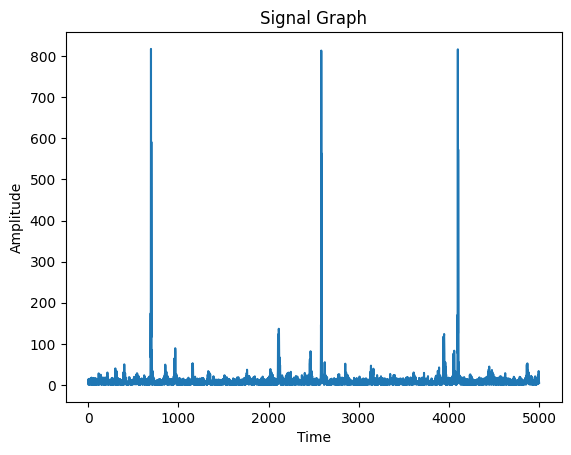

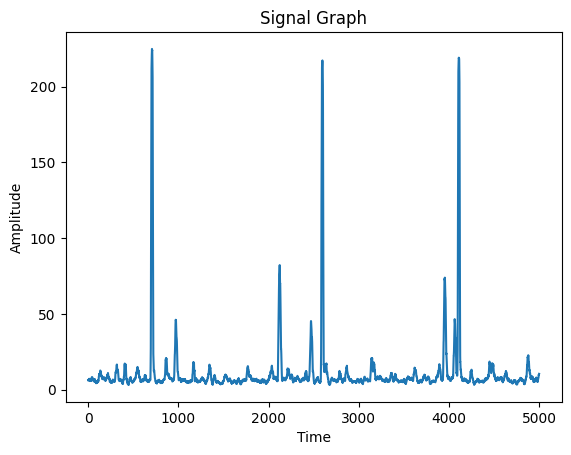

total length of samples inside the signal input  78125





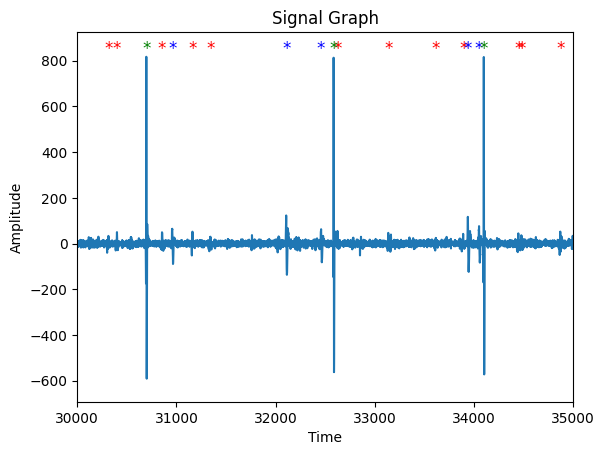

Number of templates: 3
MUAP Values:
Start: 129
End: 149
End Signal: 159
Peak Value: 48.508
Peak Index: 139
Duration: 21


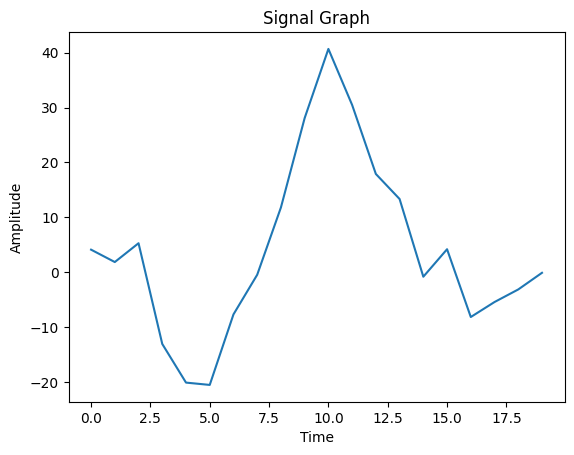

MUAP Values:
Start: 297
End: 317
End Signal: 340
Peak Value: 65.098
Peak Index: 307
Duration: 21


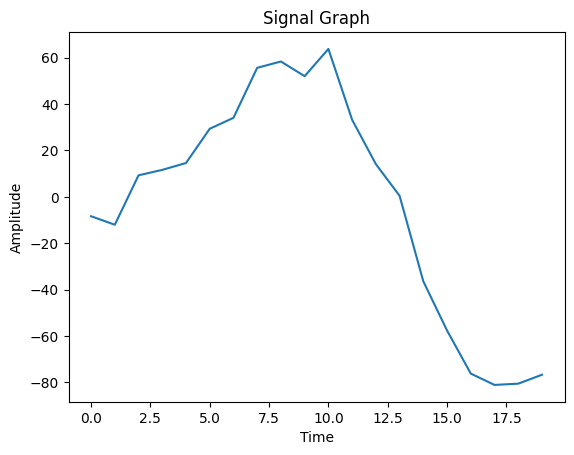

MUAP Values:
Start: 398
End: 418
End Signal: 457
Peak Value: 825.4
Peak Index: 408
Duration: 21


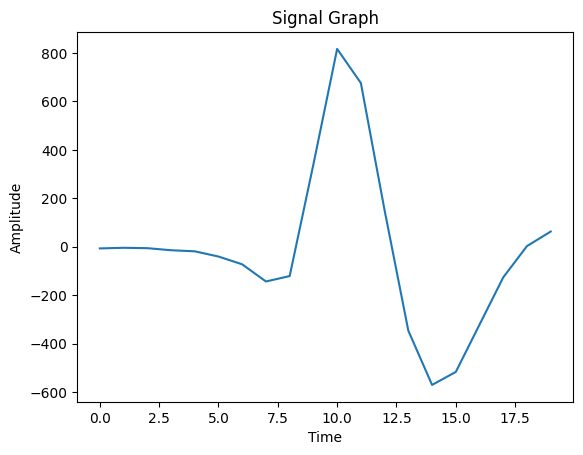

total number of found MUAPs is:  293


In [272]:
DiffTh = pow(12.5,4)
Threshold = 11.7 # = 3 * STD(noise)

MUAPs=[]


def main(signal_file_name, T):
    
    end = 0
    count_muaps = 0
    # dealing with input signal to get a smooth rectified signal to process easily.
    signal = read_signal(signal_file_name)
    rect_signal = rectify_signal(signal)
    filt_signal = Moving_average_signal(rect_signal)
    
    
    print ("total length of samples inside the signal input ",len(signal))
    print ("\n\n")
    for start in range(0, len(signal) - 1):
    #for start in range(30000, 35000):
        if start <= end:
            continue

        muap = step_one(filt_signal, start, T)
        if isinstance(muap, int) and muap > 0: #only when the function returned its not an muap
            # print("start: ", start, " is not an muap")
            end = muap
            continue
        else: # means an muap was returned with all of the needed parameters.
            count_muaps +=1
            end = muap.end_signal + 2 # de moneer elly 2aylha
            # show_MUAP_values(muap)
            MUAPs.append(muap)

    templates = step_two(MUAPs)

    bin_1 = [int(0) for value in data]
    bin_2 = [int(0) for value in data]
    bin_3 = [int(0) for value in data]
    star_1_positions = []
    star_2_positions = []
    star_3_positions = []
    for muap in MUAPs:
        if muap.corresponding_template == 1:
            star_1_positions.append(muap.peak_index)
        elif muap.corresponding_template == 2:
            star_2_positions.append(muap.peak_index)
        elif muap.corresponding_template == 3:
            star_3_positions.append(muap.peak_index)
        else:
            print("Invalid template ", muap.corresponding_template)
    for value in star_1_positions:
        bin_1[value] = 1
    for value in star_2_positions:
        bin_2[value] = 1
    for value in star_3_positions:
        bin_3[value] = 1
    spectrum_1 = fft(bin_1)
    spectrum_2 = fft(bin_2)
    spectrum_3 = fft(bin_3)
    temp_plot = final_plot_signal(signal, 30000, 35000, "DetectedMUAP.jpg", star_1_positions, star_2_positions, star_3_positions)
    temp_plot.show()
    print(f"Number of templates: {len(templates)}")
    index_template = 1
    for template in templates:
        show_MUAP_values(template, f"templates{index_template}.jpg")
        index_template += 1


    print("total number of found MUAPs is: ", count_muaps)
    return MUAPs, templates, star_1_positions, star_2_positions, star_3_positions
MUAPs, templates, star_1_positions, star_2_positions, star_3_positions = main("data.txt", 20)

C:\Users\AUC\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


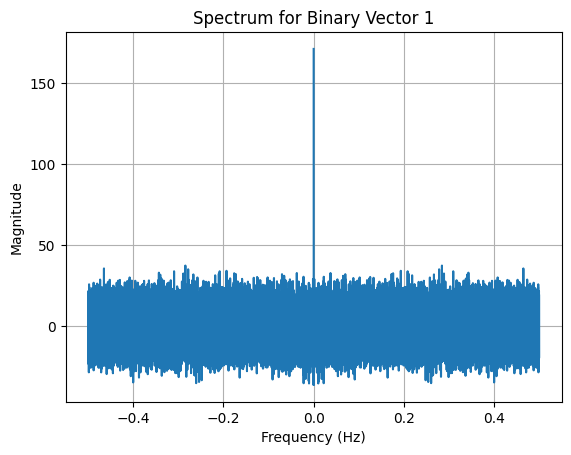

C:\Users\AUC\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


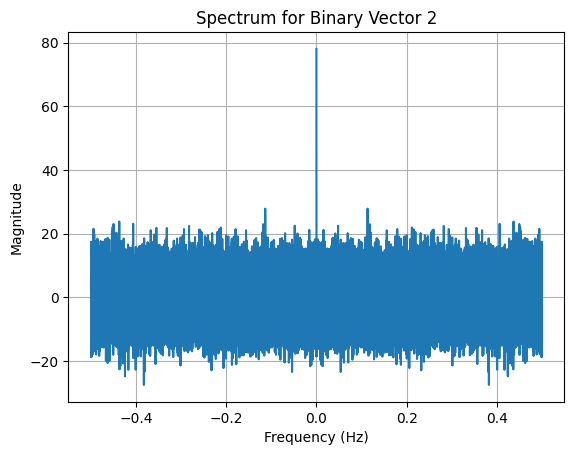

C:\Users\AUC\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


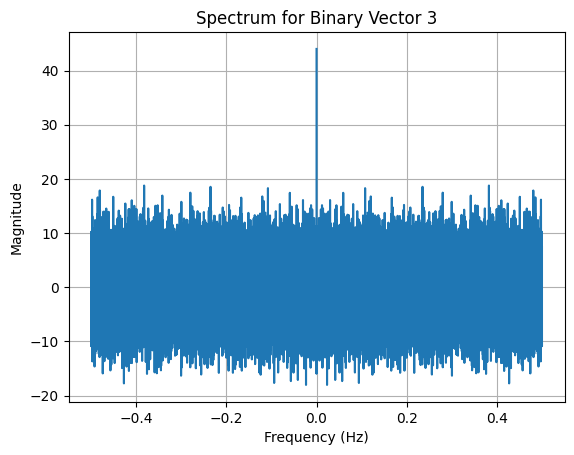

In [266]:
# Plot the first spectrum
frequencies_1 = np.fft.fftfreq(len(bin_1), d=1 / 1)
plt.plot(frequencies_1, spectrum_1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum for Binary Vector 1')
plt.savefig("Spectrum_1.jpg", dpi=300, bbox_inches='tight')
plt.grid(True)
plt.show()

# Plot the second spectrum
frequencies_2 = np.fft.fftfreq(len(bin_2), d=1 / 1)
plt.plot(frequencies_2, spectrum_2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum for Binary Vector 2')
plt.savefig("Spectrum_2.jpg", dpi=300, bbox_inches='tight')
plt.grid(True)
plt.show()

# Plot the third spectrum
frequencies_3 = np.fft.fftfreq(len(bin_3), d=1 / 1)
plt.plot(frequencies_3, spectrum_3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum for Binary Vector 3')
plt.savefig("Spectrum_3.jpg", dpi=300, bbox_inches='tight')
plt.grid(True)
plt.show()